In [14]:
# 필요 모듈 삽입


import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt 
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
# data loading


train_data = pd.read_csv('C:/Users/student/Desktop/머신러닝/data/digit-recognizer/train.csv')
test_data = np.array(pd.read_csv('C:/Users/student/Desktop/머신러닝/data/digit-recognizer/test.csv'))

In [3]:
# train data 설정


x_data = np.array(train_data.drop(['label'], axis='columns', inplace=False))
y_data = np.array(train_data['label'])

In [4]:
# y data one_hot_encoding


# tf.one_hot( 해당 데이터, 범주 갯수 )
#sess = tf.Session()
#train_y_data = sess.run(tf.one_hot(train_y_data,10))



y_data = pd.get_dummies(train_data.label).values
y_data.shape

(42000, 10)

In [33]:
# data scale

scaler=MinMaxScaler()
x_data = scaler.fit_transform(x_data)

In [34]:
# train, test data 분리

split_num = int(x_data.shape[0]*0.8)
train_x_data = x_data[:split_num]
test_x_data = x_data[split_num:]
train_y_data = y_data[:split_num]
test_y_data = y_data[split_num:]


In [35]:
# tensorflow machine learning


# palceholder
X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)

# weight, bias
W = tf.Variable(tf.random_normal([784, 10]), name='weight')
b = tf.Variable(tf.random_normal([10]), name='bias')

# H
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


In [36]:
# 학습


train_epoch = 500
batch_size = 300


for step in range(train_epoch):
    num_of_iter = int(x_data.shape[0] / batch_size)
    
    for i in range(num_of_iter):
        batch_x = x_data[i*batch_size:(i+1)*batch_size]
        batch_y = y_data[i*batch_size:(i+1)*batch_size]
        
        
        
        _, cost_val = sess.run([train, cost],
                               feed_dict={X: batch_x,
                                          Y: batch_y})
    if step % 100 == 0:
        print(f'cost값: {cost_val}')


cost값: 1.212005376815796
cost값: 0.2462136298418045
cost값: 0.20747937262058258
cost값: 0.1955113410949707
cost값: 0.18978384137153625


In [37]:
# 정확도 측정


predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(f'정확도:{sess.run(accuracy, feed_dict = {X: test_x_data, Y: test_y_data})}')

정확도:0.9469047784805298


In [38]:
# 예측

result = sess.run(tf.argmax(H,1),
                  feed_dict={X: test_data})
result

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [39]:
# 제출 파일로 저장

submission = pd.read_csv('C:/Users/student/Desktop/머신러닝/data/digit-recognizer/sample_submission.csv')
final_result= pd.DataFrame({'Label':result}) 
submission['Label'] = final_result['Label']
submission.to_csv('C:/Users/student/Desktop/머신러닝/data/submission.csv', index=False)
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


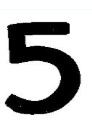

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


array([5], dtype=int64)

In [59]:
# 사진 찍어서 예측

from PIL import Image
import cv2


img = Image.open('C:/Users/student/Desktop/머신러닝/data/숫자5.jpg')
display(img)

img_np = np.array(img)

img_np.transpose(2, 0, 1)
r = img_np.transpose(2, 0, 1)[0]
g = img_np.transpose(2, 0, 1)[1]
b = img_np.transpose(2, 0, 1)[2]
img_gray= r*0.299 + g*0.587 + b*0.114

img_data = scaler.fit_transform(img_gray)
print(img_data)


img_data = cv2.resize(img_data,(784, 1))


sess.run(tf.argmax(H,1),
                  feed_dict={X:img_data})


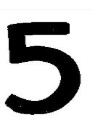

array([5], dtype=int64)

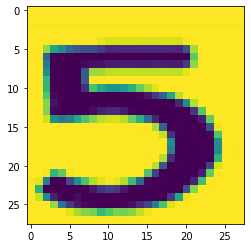

In [60]:
# 사진 찍어서 예측

import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt


img2 = pilimg.open('C:/Users/student/Desktop/머신러닝/data/숫자5.jpg').convert('L')
display(img2)

resize_img2 = img2.resize((28,28))

# Fetch image pixel data to numpy array
pix = np.array(resize_img2)
 
plt.imshow(pix)

pix = 255-pix

pix = pix.reshape(1,-1)

pix = scaler.fit_transform(pix)
sess.run(tf.argmax(H,1),
                  feed_dict={X:pix})
